In [129]:
import Pkg;
# Pkg.add("HiGHS");
# Pkg.add("JuMP");
# Pkg.add("ImageView")

In [130]:
using HiGHS;
using JuMP;
using ImageView

# Question 1: Salaries

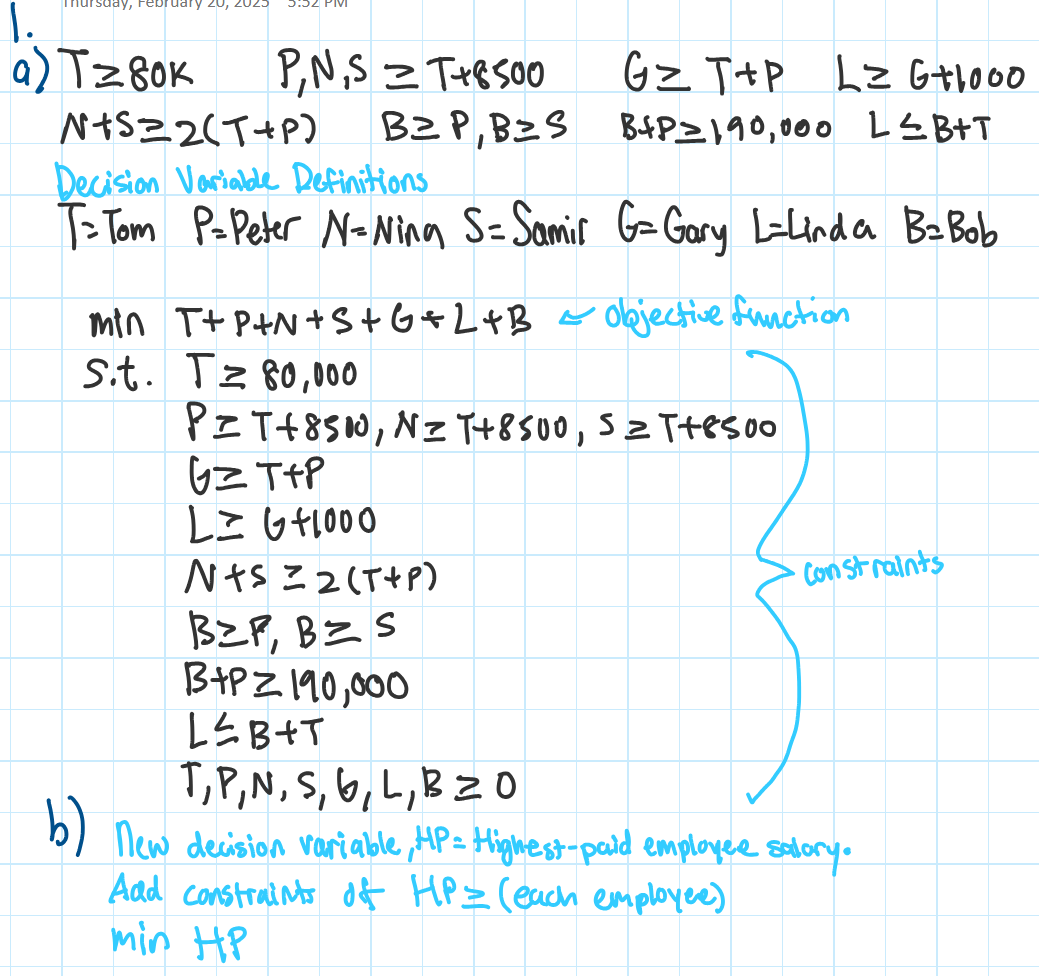

In [131]:
display("image/png", read("imgs/q1.png"))

In [132]:
names = Dict("T" => "Tom", "P" => "Peter", "N" => "Nina", "S" => "Samir", "G" => "Gary", "L" => "Linda", "B" => "Bob");
salaries = Model(HiGHS.Optimizer);

@variable(salaries, T>=0);
@variable(salaries, P>=0);
@variable(salaries, N>=0);
@variable(salaries, S>=0);
@variable(salaries, G>=0);
@variable(salaries, L>=0);
@variable(salaries, B>=0);

In [133]:
@constraint(salaries, T >= 80000);
@constraint(salaries, P >= T + 8500);
@constraint(salaries, N >= T + 8500);
@constraint(salaries, S >= T + 8500);
@constraint(salaries, G >= T + P);
@constraint(salaries, L >= G + 1000);
@constraint(salaries, N + S >= 2*(T+P));
@constraint(salaries, B >= P);
@constraint(salaries, B >= S);
@constraint(salaries, B+P >= 190000);
@constraint(salaries, L <= B + T);

In [134]:
@objective(salaries, Min, T + P + N + S + G + L + B);

In [135]:
optimize!(salaries);

Running HiGHS 1.9.0 (git hash: 66f735e60): Copyright (c) 2024 HiGHS under MIT licence terms
Coefficient ranges:
  Matrix [1e+00, 2e+00]
  Cost   [1e+00, 1e+00]
  Bound  [0e+00, 0e+00]
  RHS    [1e+03, 2e+05]
Presolving model
10 rows, 7 cols, 24 nonzeros  0s
8 rows, 5 cols, 18 nonzeros  0s
0 rows, 0 cols, 0 nonzeros  0s
Presolve : Reductions: rows 0(-11); columns 0(-7); elements 0(-25) - Reduced to empty
Solving the original LP from the solution after postsolve
Model status        : Optimal
Objective value     :  9.4500000000e+05
Relative P-D gap    :  0.0000000000e+00
HiGHS run time      :          0.00


In [136]:
println("Min total salary: ", objective_value(salaries))
println("Tom: ", value(T))
println("Peter: ", value(P))
println("Nina: ", value(N))
println("Samir: ", value(S))
println("Gary: ", value(G))
println("Linda: ", value(L))
println("Bob: ", value(B))


Min total salary: 945000.0
Tom: 80000.0
Peter: 88500.0
Nina: 248500.0
Samir: 88500.0
Gary: 168500.0
Linda: 169500.0
Bob: 101500.0


In [137]:
salaries_2 = Model(HiGHS.Optimizer);

@variable(salaries_2, T>=0);
@variable(salaries_2, P>=0);
@variable(salaries_2, N>=0);
@variable(salaries_2, S>=0);
@variable(salaries_2, G>=0);
@variable(salaries_2, L>=0);
@variable(salaries_2, B>=0);
@variable(salaries_2, M>=0); # New variable of largest employee salary

@constraint(salaries_2, T >= 80000);
@constraint(salaries_2, P >= T + 8500);
@constraint(salaries_2, N >= T + 8500);
@constraint(salaries_2, S >= T + 8500);
@constraint(salaries_2, G >= T + P);
@constraint(salaries_2, L >= G + 1000);
@constraint(salaries_2, N + S >= 2*(T+P));
@constraint(salaries_2, B >= P);
@constraint(salaries_2, B >= S);
@constraint(salaries_2, B+P >= 190000);
@constraint(salaries_2, L <= B + T);
# New constraints
@constraint(salaries_2, M >= T);
@constraint(salaries_2, M >= P);
@constraint(salaries_2, M >= N);
@constraint(salaries_2, M >= S);
@constraint(salaries_2, M >= G);
@constraint(salaries_2, M >= L);
@constraint(salaries_2, M >= B);



-B + M >= 0

In [138]:
@objective(salaries_2, Min, M);
optimize!(salaries_2);

Running HiGHS 1.9.0 (git hash: 66f735e60): Copyright (c) 2024 HiGHS under MIT licence terms
Coefficient ranges:
  Matrix [1e+00, 2e+00]
  Cost   [1e+00, 1e+00]
  Bound  [0e+00, 0e+00]
  RHS    [1e+03, 2e+05]
Presolving model
17 rows, 8 cols, 38 nonzeros  0s
14 rows, 5 cols, 32 nonzeros  0s
2 rows, 2 cols, 4 nonzeros  0s
2 rows, 2 cols, 4 nonzeros  0s
Presolve : Reductions: rows 2(-16); columns 2(-6); elements 4(-35)
Solving the presolved LP
Using EKK dual simplex solver - serial
  Iteration        Objective     Infeasibilities num(sum)
          0     1.6950030992e+05 Pr: 1(79000) 0s
          1     1.6950000000e+05 Pr: 0(0) 0s
Solving the original LP from the solution after postsolve
Model status        : Optimal
Simplex   iterations: 1
Objective value     :  1.6950000000e+05
Relative P-D gap    :  0.0000000000e+00
HiGHS run time      :          0.00


In [139]:
println("Min largest salary: ", objective_value(salaries_2))
println("Tom: ", value(T))
println("Peter: ", value(P))
println("Nina: ", value(N))
println("Samir: ", value(S))
println("Gary: ", value(G))
println("Linda: ", value(L))
println("Bob: ", value(B))

Min largest salary: 169500.0
Tom: 80000.0
Peter: 88500.0
Nina: 169500.0
Samir: 167500.0
Gary: 168500.0
Linda: 169500.0
Bob: 169500.0


# Question 2: Officers

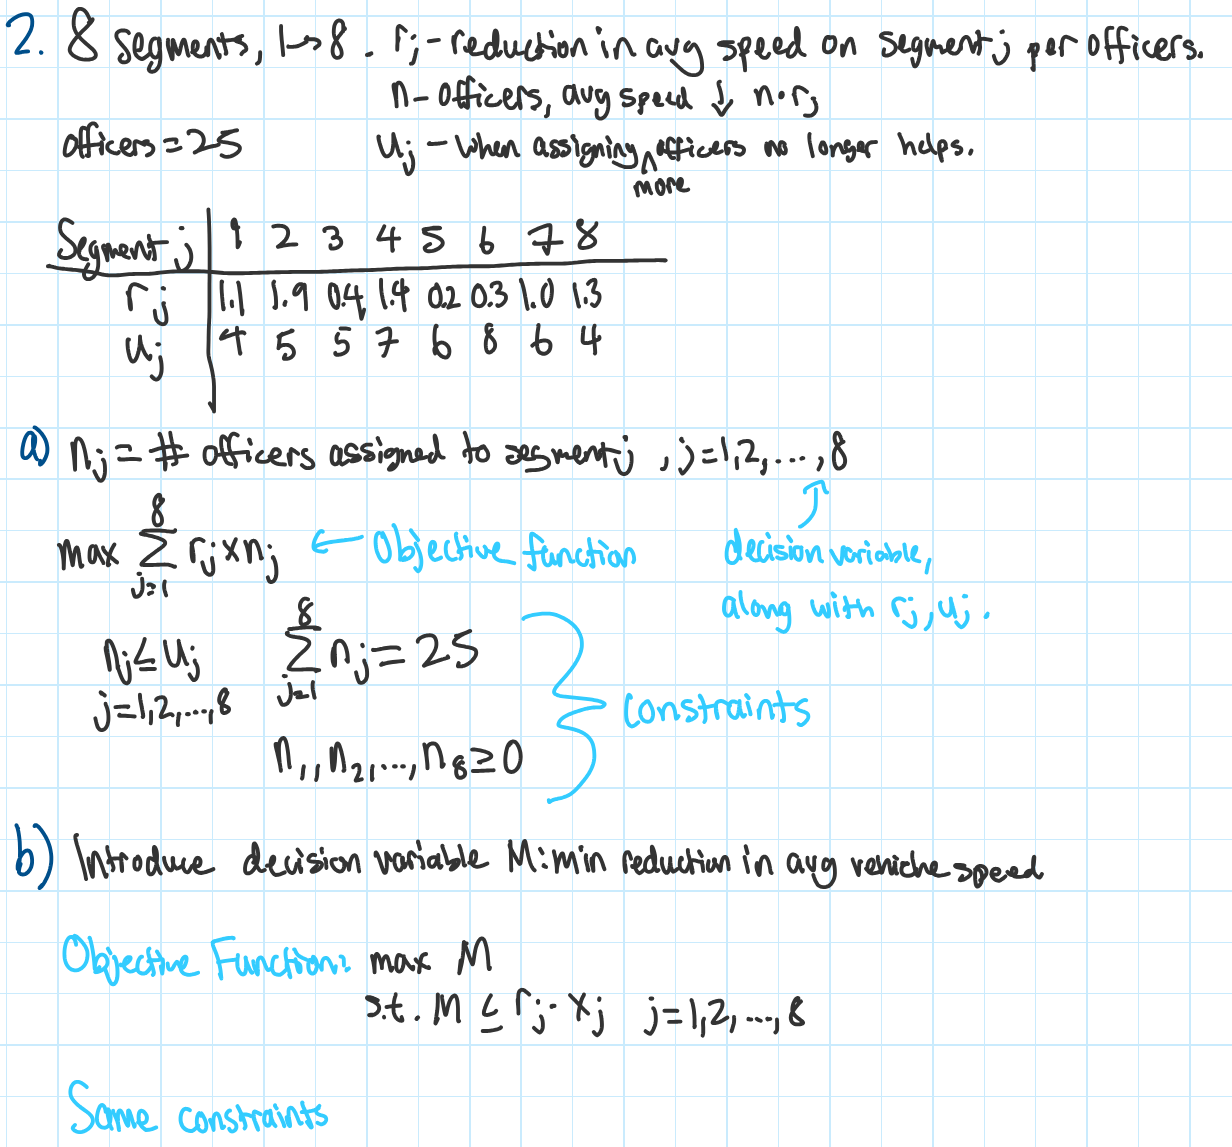

In [140]:
display("image/png", read("imgs/q2.png"))

In [141]:
officers = Model(HiGHS.Optimizer);

r = [1.1,1.9,0.4,1.4,0.2,0.3,1.0,1.3];
u = [4,5,5,7,6,8,6,4];

@variable(officers, u[i]>=n[i=1:8]>=0);
@variable(officers, M);

@constraint(officers, sum(n) == 25);
@constraint(officers, [i=1:8], M <= r[i]*u[i]);

@objective(officers, Max, M);

optimize!(officers);

Running HiGHS 1.9.0 (git hash: 66f735e60): Copyright (c) 2024 HiGHS under MIT licence terms
Coefficient ranges:
  Matrix [1e+00, 1e+00]
  Cost   [1e+00, 1e+00]
  Bound  [4e+00, 8e+00]
  RHS    [1e+00, 2e+01]
Presolving model
1 rows, 8 cols, 8 nonzeros  0s
0 rows, 0 cols, 0 nonzeros  0s
0 rows, 0 cols, 0 nonzeros  0s
Presolve : Reductions: rows 0(-9); columns 0(-9); elements 0(-16) - Reduced to empty
Solving the original LP from the solution after postsolve
Model status        : Optimal
Objective value     :  1.2000000000e+00
Relative P-D gap    :  0.0000000000e+00
HiGHS run time      :          0.00


In [142]:
@show objective_value(officers);
@show value.(n);

objective_value(officers) = 1.2000000000000002
value.(n) = [0.0, 0.0, 0.0, 1.0, 6.0, 8.0, 6.0, 4.0]


Optimal Officers in each segment i: \
1: 0 \
2: 0 \
3: 0 \
4: 1 \
5: 6 \
6: 8 \
7: 6 \
8: 4 

# Question 3: Cleaning Air

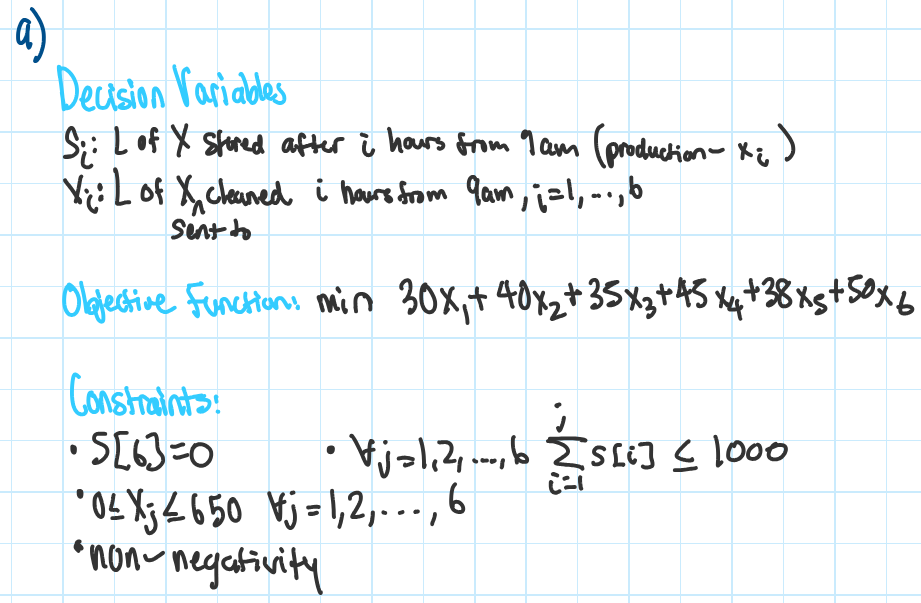

In [143]:
display("image/png", read("imgs/q3.png"))

In [144]:
clean = Model(HiGHS.Optimizer);
produce = [350,240,550,200,300,600]
cost = [30,40,35,45,38,50]

@variable(clean, 650>=x[i=1:6]>=0); #Cleaned/hour
@variable(clean, s[i=0:6]>=0); #storage after hour i

@constraint(clean, s[6] == 0);
@constraint(clean, s[0] == 0);
@constraint(clean, [i=1:6], s[i] == s[i-1] + produce[i] - x[i]);
@constraint(clean, [i=1:6], s[i] <= 1000);

@objective(clean, Min, sum(cost[i] * x[i] for i in 1:6));

optimize!(clean);
# Print all optimal variable values
println("Optimal variable values: ", value.(x))
# Print the optimal objective value
println("Optimal objective value: ", objective_value(clean))

Running HiGHS 1.9.0 (git hash: 66f735e60): Copyright (c) 2024 HiGHS under MIT licence terms
Coefficient ranges:
  Matrix [1e+00, 1e+00]
  Cost   [3e+01, 5e+01]
  Bound  [6e+02, 6e+02]
  RHS    [2e+02, 1e+03]
Presolving model
4 rows, 9 cols, 12 nonzeros  0s
4 rows, 9 cols, 12 nonzeros  0s
Presolve : Reductions: rows 4(-10); columns 9(-4); elements 12(-14)
Solving the presolved LP
Using EKK dual simplex solver - serial
  Iteration        Objective     Infeasibilities num(sum)
          0     0.0000000000e+00 Ph1: 0(0) 0s
          6     8.7570000000e+04 Pr: 0(0) 0s
Solving the original LP from the solution after postsolve
Model status        : Optimal
Simplex   iterations: 6
Objective value     :  8.7570000000e+04
Relative P-D gap    :  0.0000000000e+00
HiGHS run time      :          0.00
Optimal variable values: [350.0, 0.0, 650.0, 0.0, 640.0, 600.0]
Optimal objective value: 87570.0


Optimal values to be cleaned: \
9-10 am: 350 L \
10-11 am: 0 L \
11-12 pm: 650 L \
12-1 pm: 0 L \
1-2 pm: 640 L \
2-3 pm: 600 L